In [182]:
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append("../")

from linkage.linker import similarity
from tokenizer.tokenizer import tokenize

REF_M = tokenize(["M"], eps=10)
REF_F = tokenize(["F"], eps=10)


def guess(token):
    return "M" if similarity(token, REF_M) > similarity(token, REF_F) else "F"


# Parameters for calculations
P_FLIPS = np.linspace(0.4, 0.6, 200)
N = 200

# Calculate accuracies for the guess
accuracies_2 = [
    sum([guess(tokenize([s], eta=1 - pflip)) == s for s in "MF" for _ in range(N)])
    / (2 * N)
    for pflip in P_FLIPS
]

# Calculate sigmoid fitting function
y_sigmoid_2 = [1 - 1 / (1 + np.exp(-(p-0.5)*80)) for p in P_FLIPS]

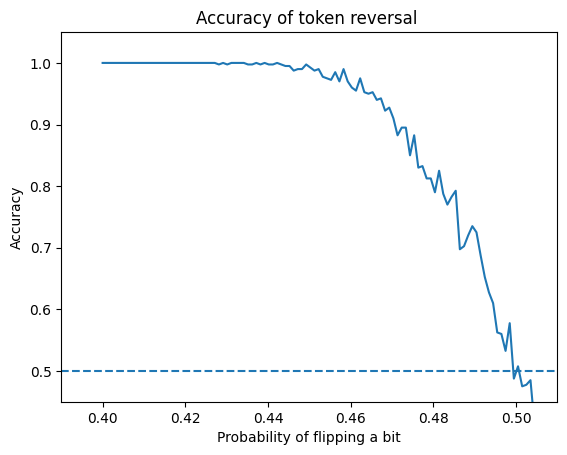

In [185]:
plt.plot(P_FLIPS, accuracies_2)
plt.xlabel("Probability of flipping a bit")
plt.ylabel("Accuracy")
plt.title("Accuracy of token reversal ")
plt.xlim(0.39, 0.51)
plt.ylim(0.45, 1.05)
plt.hlines(0.5, 0.39, 0.51, linestyles="dashed")
pass

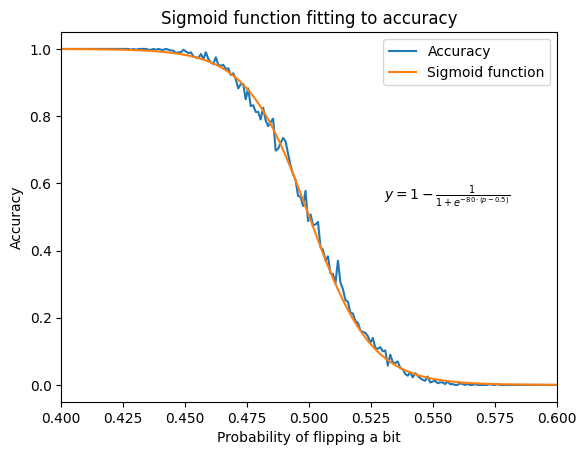

In [186]:
plt.plot(P_FLIPS, accuracies_2, label="Accuracy")
plt.plot(P_FLIPS, y_sigmoid_2, label="Sigmoid function")
plt.legend()
plt.xlabel("Probability of flipping a bit")
plt.ylabel("Accuracy")
plt.title("Sigmoid function fitting to accuracy")
plt.xlim(0.4, 0.6)
plt.text(0.53, 0.55, "$y = 1 - \\frac{1}{1 + e^{-80\cdot(p-0.5)}}$")
pass

Text(0.5, 0.5, 'pflip = 1 / (1 + exp(eps))')

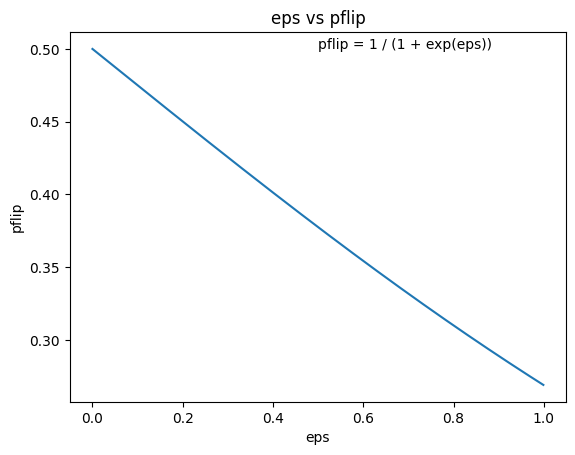

In [187]:
epss = np.arange(0, 1, 0.001)
plips = [1.0 / (1.0 + np.exp(eps)) for eps in epss]
plt.plot(epss, plips)
plt.xlabel("eps")
plt.ylabel("pflip")
plt.title("eps vs pflip")
plt.text(0.5, 0.5, "pflip = 1 / (1 + exp(eps))")

In [188]:
def accuracies(n):
    REF = {str(i): tokenize([str(i)], eps=10) for i in range(n)}

    def guess(token):
        return max(REF, key=lambda s: similarity(token, REF[s]))

    # Parameters for calculations
    p_flips = np.linspace(0.3, 0.7, 40)
    N = 100

    # Calculate accuracies for the guess
    return p_flips, [
        sum([guess(tokenize(["1"], eta=1 - p)) == "1" for _ in range(N)]) / N
        for p in p_flips
    ]

In [190]:
p_flips, accuracies_100 = accuracies(100)

plt.plot(P_FLIPS, accuracies_100)
plt.xlabel("Probability of flipping a bit")
plt.ylabel("Accuracy")
plt.title("Accuracy of token reversal ")
plt.xlim([0.35, 0.5])
plt.hlines(0.5, min(P_FLIPS), max(P_FLIPS), linestyles="dashed")

#y_sigmoid_100 = [1 - 1 / (1 + np.exp(-(p-0.465)*95)) for p in P_FLIPS]
#plt.plot(P_FLIPS, y_sigmoid_100, label="Sigmoid")
pass

KeyboardInterrupt: 

In [ ]:
accuracies_10000 = accuracies(10000)

plt.plot(P_FLIPS, accuracies_10000)
plt.xlabel("Probability of flipping a bit")
plt.ylabel("Accuracy")
plt.title("Accuracy of token reversal ")
plt.xlim([0.35, 0.5])
plt.hlines(0.5, min(P_FLIPS), max(P_FLIPS), linestyles="dashed")

y_sigmoid_10000 = [1 - 1 / (1 + np.exp(-(p-0.465)*95)) for p in P_FLIPS]
plt.plot(P_FLIPS, y_sigmoid_100, label="Sigmoid")
pass